##To create a cell of another language, start the cell with:
- %md - Markdown
- %sql - SQL
- %scala - Scala
- %python - Python
- %r - R
- %sh - Shell
- %fs - Databricks File System
- [Notebooks with Databricks](https://databricks-prod-cloudfront.cloud.databricks.com/public/4027ec902e239c93eaaa8714f173bcfc/2019135542862542/584054368563718/5339565930708803/latest.html)

- [converting boolean values to strings in Pyspark](https://stackoverflow.com/questions/51142864/using-when-and-otherwise-while-converting-boolean-values-to-strings-in-pyspark)

- [pyspark blog 1](https://vishalmnemonic.github.io/_posts/2018-10-21-DC11/)

- [pyspark blog 2](https://towardsdatascience.com/distributed-deep-learning-pipelines-with-pyspark-and-keras-a3a1c22b9239)

- [SparkML_RandomForest_Regression](https://gist.github.com/colbyford/f1f621cf45c6a62a9269348352f6609f)

###Data Loader

In [0]:
%sh wget https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv

--2021-10-31 19:28:27-- https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1072063 (1.0M) [application/x-httpd-php]
Saving to: ‘online_shoppers_intention.csv’

 0K .......... .......... .......... .......... .......... 4% 828K 1s
 50K .......... .......... .......... .......... .......... 9% 847K 1s
 100K .......... .......... .......... .......... .......... 14% 36.0M 1s
 150K .......... .......... .......... .......... .......... 19% 1.70M 1s
 200K .......... .......... .......... .......... .......... 23% 61.1M 0s
 250K .......... .......... .......... .......... .......... 28% 12.1M 0s
 300K .......... .......... .......... .......... .......... 33% 1.99M 0s
 350K .......... .......... .......... .......... .......... 38% 23.6M 0s
 400K .......... .......... .......... .......... .......... 42% 13.8M 0s
 450K .......... .......... .......... .......... .......... 47% 25.5M 0s
 500K .......... .......... .......... .......... .......... 52% 2.05M 0s
 550K .......... .......... .......... .......... .......... 57% 20.6M 0s
 600K .......... .......... .......... .......... .......... 62% 47.2M 0s
 650K .......... .......... .......... .......... .......... 66% 25.7M 0s
 700K .......... .......... .......... .......... .......... 71% 27.0M 0s
 750K .......... .......... .......... .......... .......... 76% 5.38M 0s
 800K .......... .......... .......... .......... .......... 81% 12.6M 0s
 850K .......... .......... .......... .......... .......... 85% 11.2M 0s
 900K .......... .......... .......... .......... .......... 90% 13.5M 0s
 950K .......... .......... .......... .......... .......... 95% 19.9M 0s
 1000K .......... .......... .......... .......... ...... 100% 23.5M=0.2s

2021-10-31 19:28:28 (4.21 MB/s) - ‘online_shoppers_intention.csv’ saved [1072063/1072063]

In [0]:
%sh
ls .

conf
derby.log
eventlogs
logs
metastore_db
online_shoppers_intention.csv
preload_class.lst

#Spark version

In [0]:
# Verify SparkContext
print(sc)
# Print Spark version
print(sc.version)

<SparkContext master=local[8] appName=Databricks Shell>
3.1.0

###Exploring The Data

In [0]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('ml-online-shoppers-intention').getOrCreate()
df = spark.read.csv('file:/databricks/driver/online_shoppers_intention.csv', header = True, inferSchema = True, sep=',')
df.printSchema()

root
-- Administrative: integer (nullable = true)
-- Administrative_Duration: double (nullable = true)
-- Informational: integer (nullable = true)
-- Informational_Duration: double (nullable = true)
-- ProductRelated: integer (nullable = true)
-- ProductRelated_Duration: double (nullable = true)
-- BounceRates: double (nullable = true)
-- ExitRates: double (nullable = true)
-- PageValues: double (nullable = true)
-- SpecialDay: double (nullable = true)
-- Month: string (nullable = true)
-- OperatingSystems: integer (nullable = true)
-- Browser: integer (nullable = true)
-- Region: integer (nullable = true)
-- TrafficType: integer (nullable = true)
-- VisitorType: string (nullable = true)
-- Weekend: boolean (nullable = true)
-- Revenue: boolean (nullable = true)

In [0]:
from pyspark.sql.functions import col
from pyspark.sql.types import IntegerType, BooleanType, StringType, StructType, StructField


df = df.withColumn('Weekend', col('Weekend').cast(StringType()))
df = df.withColumn('Revenue', col('Revenue').cast(StringType()))
df.printSchema()

root
-- Administrative: integer (nullable = true)
-- Administrative_Duration: double (nullable = true)
-- Informational: integer (nullable = true)
-- Informational_Duration: double (nullable = true)
-- ProductRelated: integer (nullable = true)
-- ProductRelated_Duration: double (nullable = true)
-- BounceRates: double (nullable = true)
-- ExitRates: double (nullable = true)
-- PageValues: double (nullable = true)
-- SpecialDay: double (nullable = true)
-- Month: string (nullable = true)
-- OperatingSystems: integer (nullable = true)
-- Browser: integer (nullable = true)
-- Region: integer (nullable = true)
-- TrafficType: integer (nullable = true)
-- VisitorType: string (nullable = true)
-- Weekend: string (nullable = true)
-- Revenue: string (nullable = true)

In [0]:
import pandas as pd

pd.DataFrame(df.take(5), columns=df.columns)

Out[34]:

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,false,false
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,false,false
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,false,false
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,false,false
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,true,false


In [0]:
df.take(5)

Out[35]: [Row(Administrative=0, Administrative_Duration=0.0, Informational=0, Informational_Duration=0.0, ProductRelated=1, ProductRelated_Duration=0.0, BounceRates=0.2, ExitRates=0.2, PageValues=0.0, SpecialDay=0.0, Month='Feb', OperatingSystems=1, Browser=1, Region=1, TrafficType=1, VisitorType='Returning_Visitor', Weekend='false', Revenue='false'),
 Row(Administrative=0, Administrative_Duration=0.0, Informational=0, Informational_Duration=0.0, ProductRelated=2, ProductRelated_Duration=64.0, BounceRates=0.0, ExitRates=0.1, PageValues=0.0, SpecialDay=0.0, Month='Feb', OperatingSystems=2, Browser=2, Region=1, TrafficType=2, VisitorType='Returning_Visitor', Weekend='false', Revenue='false'),
 Row(Administrative=0, Administrative_Duration=0.0, Informational=0, Informational_Duration=0.0, ProductRelated=1, ProductRelated_Duration=0.0, BounceRates=0.2, ExitRates=0.2, PageValues=0.0, SpecialDay=0.0, Month='Feb', OperatingSystems=4, Browser=1, Region=9, TrafficType=3, VisitorType='Returning_Visitor', Weekend='false', Revenue='false'),
 Row(Administrative=0, Administrative_Duration=0.0, Informational=0, Informational_Duration=0.0, ProductRelated=2, ProductRelated_Duration=2.666666667, BounceRates=0.05, ExitRates=0.14, PageValues=0.0, SpecialDay=0.0, Month='Feb', OperatingSystems=3, Browser=2, Region=2, TrafficType=4, VisitorType='Returning_Visitor', Weekend='false', Revenue='false'),
 Row(Administrative=0, Administrative_Duration=0.0, Informational=0, Informational_Duration=0.0, ProductRelated=10, ProductRelated_Duration=627.5, BounceRates=0.02, ExitRates=0.05, PageValues=0.0, SpecialDay=0.0, Month='Feb', OperatingSystems=3, Browser=3, Region=1, TrafficType=4, VisitorType='Returning_Visitor', Weekend='true', Revenue='false')]

###Summary statistics for numeric variables

In [0]:
numeric_features = [t[0] for t in df.dtypes if t[1] == 'int' or  t[1] == 'double']

df.select(numeric_features).describe().toPandas()

Out[36]:

,summary,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
0,count,12330,12330,12330,12330,12330,12330,12330,12330,12330,12330,12330,12330,12330,12330
1,mean,2.3151662611516626,80.81861053933578,0.5035685320356853,34.47239792772309,31.731467964314678,1194.7462199688305,0.02219138047072152,0.04307279776650371,5.889257862693596,0.0614274128142742,2.124006488240065,2.357096512570965,3.1473641524736413,4.069586374695864
2,stddev,3.3217841061569113,176.77910747048603,1.2701564259833897,140.74929442219778,44.475503304936574,1913.6692878720012,0.048488321806260705,0.048596540551443634,18.5684366078065,0.19891727315262886,0.9113248287106618,1.7172766755534368,2.4015912367437138,4.025169160452508
3,min,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,1,1,1,1
4,max,27,3398.75,24,2549.375,705,63973.52223,0.2,0.2,361.7637419,1.0,8,13,9,20


In [0]:
display(df.select("ProductRelated_Duration").summary())

summary,ProductRelated_Duration
count,12330
mean,1194.7462199688305
stddev,1913.6692878720012
min,0.0
25%,184.1
50%,598.7833333
75%,1464.0
max,63973.52223


In [0]:
display(df.groupBy("VisitorType").count().sort('count', ascending=False))

VisitorType,count
Returning_Visitor,10551
New_Visitor,1694
Other,85


In [0]:
display(df.groupBy("Revenue").count().sort('count', ascending=False))

Revenue,count
false,10422
true,1908


###Plot 'Revenue' variable 
The 'Revenue' variable can be used as the target label. This variable is imbalanced, such that 84.5% of user journeys did NOT result in a purchase (Revenue=False)

12330
Out[40]:

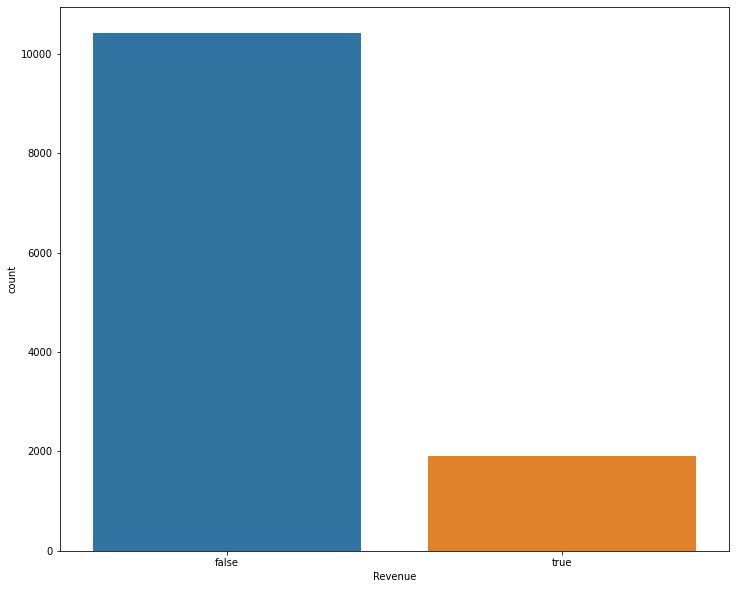

<matplotlib.axes._subplots.AxesSubplot at 0x7fd65c468610>

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(12,10))
df_pd = df.toPandas()
print(len(df_pd))
plt.figure(figsize=(12,10))
sns.countplot(x='Revenue', data=df_pd, order=df_pd['Revenue'].value_counts().index)

###Correlations between independent variables

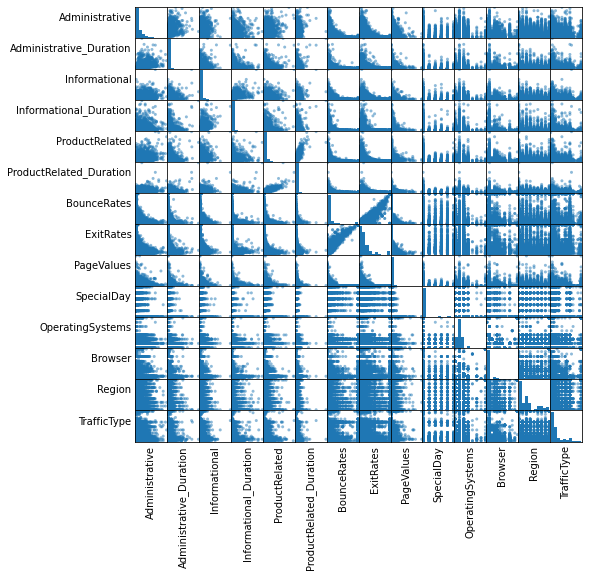

In [0]:
numeric_data = df.select(numeric_features).toPandas()
axs = pd.plotting.scatter_matrix(numeric_data, figsize=(8, 8));
n = len(numeric_data.columns)

for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())

In [0]:
df = df.select('Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue')
cols = df.columns
df.printSchema()

root
-- Administrative: integer (nullable = true)
-- Administrative_Duration: double (nullable = true)
-- Informational: integer (nullable = true)
-- Informational_Duration: double (nullable = true)
-- ProductRelated: integer (nullable = true)
-- ProductRelated_Duration: double (nullable = true)
-- BounceRates: double (nullable = true)
-- ExitRates: double (nullable = true)
-- PageValues: double (nullable = true)
-- OperatingSystems: integer (nullable = true)
-- Browser: integer (nullable = true)
-- Region: integer (nullable = true)
-- TrafficType: integer (nullable = true)
-- VisitorType: string (nullable = true)
-- Weekend: string (nullable = true)
-- Revenue: string (nullable = true)

In [0]:
from pyspark.ml.feature import OneHotEncoder , StringIndexer, VectorAssembler

categoricalColumns = ['VisitorType', 'Weekend']
numericColumns = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'OperatingSystems', 'Browser', 'Region']
label = 'Revenue'

stages = []

for categoricalCol in categoricalColumns:
    stringIndexer = StringIndexer(inputCol = categoricalCol, outputCol = categoricalCol + 'Index')
    encoder = OneHotEncoder(inputCols=[stringIndexer.getOutputCol()], outputCols=[categoricalCol + "classVec"])
    stages += [stringIndexer, encoder]

 
    
label_stringIdx = StringIndexer(inputCol = label, outputCol = 'label')

stages += [label_stringIdx]

assemblerInputs = [c + "classVec" for c in categoricalColumns] + numericColumns

# Use VectorAssembler and pass in assemblerInputs as inputCols and name the outputCol "features"
assembler= VectorAssembler(inputCols = assemblerInputs , outputCol = 'features')

# 
stages += [assembler]

In [0]:
stages

Out[46]: [StringIndexer_20fd907d2a35,
 OneHotEncoder_a63b13f70863,
 StringIndexer_dbde227b99c8,
 OneHotEncoder_80a16e98793d,
 StringIndexer_c189ff801510,
 VectorAssembler_9eabc9098d2f]

#Build the pipeline

In [0]:
from pyspark.ml import Pipeline

# Define the pipeline based on the stages created in previous steps.
pipeline = Pipeline(stages=stages)


# Define the pipeline model and fit on trainDF.
pipelineModel = pipeline.fit(df)

# Transform data using fitted pipeline
df_transform = pipelineModel.transform(df) 

trainDF, testDF = df_transform.randomSplit([0.8, 0.2], seed = 42)


#Classifier 1 : Logistic Regression

In [0]:
from pyspark.ml.classification import LogisticRegression
### START CODE ###
# Define a LogisticRegression model and specify featuresCol as "features", labelCol as "label" and regParam as 1.0
lr = LogisticRegression(featuresCol = 'features', labelCol = 'label', maxIter=10, regParam=1.0)

In [0]:
lr_model = lr.fit(trainDF)

# Apply the pipeline model to the test dataset using transform.
predDF = lr_model.transform(testDF)
### END CODE ###

In [0]:
cols = df_transform.columns
selectedCols = ['features']+cols
new_df = df_transform.select(selectedCols)
pd.DataFrame(new_df.take(5), columns=new_df.columns)

Out[52]:

,features,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,VisitorTypeIndex,VisitorTypeclassVec,WeekendIndex,WeekendclassVec,label,features
0,"(1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...",0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,1,1,1,1,Returning_Visitor,false,false,0.0,"(1.0, 0.0)",0.0,(1.0),0.0,"(1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ..."
1,"(1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 2.0, 64.0,...",0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,2,2,1,2,Returning_Visitor,false,false,0.0,"(1.0, 0.0)",0.0,(1.0),0.0,"(1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 2.0, 64.0,..."
2,"(1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...",0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,4,1,9,3,Returning_Visitor,false,false,0.0,"(1.0, 0.0)",0.0,(1.0),0.0,"(1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ..."
3,"[1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 2.0, 2.666...",0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,3,2,2,4,Returning_Visitor,false,false,0.0,"(1.0, 0.0)",0.0,(1.0),0.0,"[1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 2.0, 2.666..."
4,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 627....",0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,3,3,1,4,Returning_Visitor,true,false,0.0,"(1.0, 0.0)",1.0,(0.0),0.0,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 627...."


In [0]:
display(predDF.select("features", "label", "prediction", "probability"))

features,label,prediction,probability
"Map(vectorType -> sparse, length -> 15, indices -> List(0, 2, 9, 10, 12, 13, 14), values -> List(1.0, 1.0, 0.2, 0.2, 1.0, 1.0, 9.0))",0.0,0.0,"Map(vectorType -> dense, length -> 2, values -> List(0.9011756905083633, 0.09882430949163667))"
"Map(vectorType -> sparse, length -> 15, indices -> List(0, 2, 7, 10, 12, 13, 14), values -> List(1.0, 1.0, 1.0, 0.1, 2.0, 2.0, 2.0))",0.0,0.0,"Map(vectorType -> dense, length -> 2, values -> List(0.8745863996354837, 0.12541360036451632))"
"Map(vectorType -> sparse, length -> 15, indices -> List(0, 2, 7, 10, 12, 13, 14), values -> List(1.0, 1.0, 1.0, 0.1, 2.0, 6.0, 1.0))",0.0,0.0,"Map(vectorType -> dense, length -> 2, values -> List(0.87284638784329, 0.12715361215670995))"
"Map(vectorType -> sparse, length -> 15, indices -> List(0, 2, 7, 10, 12, 13, 14), values -> List(1.0, 1.0, 1.0, 0.2, 2.0, 2.0, 5.0))",0.0,0.0,"Map(vectorType -> dense, length -> 2, values -> List(0.8864286461352635, 0.11357135386473649))"
"Map(vectorType -> sparse, length -> 15, indices -> List(2, 7, 9, 10, 12, 13, 14), values -> List(1.0, 1.0, 0.2, 0.2, 1.0, 1.0, 1.0))",0.0,0.0,"Map(vectorType -> dense, length -> 2, values -> List(0.8936986704599742, 0.1063013295400258))"
"Map(vectorType -> sparse, length -> 15, indices -> List(0, 2, 7, 9, 10, 12, 13, 14), values -> List(1.0, 1.0, 1.0, 0.2, 0.2, 1.0, 1.0, 1.0))",0.0,0.0,"Map(vectorType -> dense, length -> 2, values -> List(0.9009095073140195, 0.09909049268598047))"
"Map(vectorType -> sparse, length -> 15, indices -> List(0, 7, 9, 10, 12, 13, 14), values -> List(1.0, 1.0, 0.2, 0.2, 1.0, 1.0, 1.0))",0.0,0.0,"Map(vectorType -> dense, length -> 2, values -> List(0.8991205024687747, 0.10087949753122527))"
"Map(vectorType -> sparse, length -> 15, indices -> List(0, 7, 9, 10, 12, 13, 14), values -> List(1.0, 1.0, 0.2, 0.2, 1.0, 1.0, 1.0))",0.0,0.0,"Map(vectorType -> dense, length -> 2, values -> List(0.8991205024687747, 0.10087949753122527))"
"Map(vectorType -> sparse, length -> 15, indices -> List(0, 2, 7, 9, 10, 12, 13, 14), values -> List(1.0, 1.0, 1.0, 0.2, 0.2, 1.0, 1.0, 1.0))",0.0,0.0,"Map(vectorType -> dense, length -> 2, values -> List(0.9009095073140195, 0.09909049268598047))"
"Map(vectorType -> sparse, length -> 15, indices -> List(0, 2, 7, 9, 10, 12, 13, 14), values -> List(1.0, 1.0, 1.0, 0.2, 0.2, 1.0, 1.0, 1.0))",0.0,0.0,"Map(vectorType -> dense, length -> 2, values -> List(0.9009095073140195, 0.09909049268598047))"


#Evaluate the model

In [0]:
display(predDF.drop("prediction", "rawPrediction", "probability"), "ROC")

Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,VisitorTypeIndex,VisitorTypeclassVec,WeekendIndex,WeekendclassVec,label,features
0,0.0,0,0.0,0,0.0,0.2,0.2,0.0,1,1,9,2,Returning_Visitor,false,false,0.0,"Map(vectorType -> sparse, length -> 2, indices -> List(0), values -> List(1.0))",0.0,"Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))",0.0,"Map(vectorType -> sparse, length -> 15, indices -> List(0, 2, 9, 10, 12, 13, 14), values -> List(1.0, 1.0, 0.2, 0.2, 1.0, 1.0, 9.0))"
0,0.0,0,0.0,1,0.0,0.0,0.1,0.0,2,2,2,6,Returning_Visitor,false,false,0.0,"Map(vectorType -> sparse, length -> 2, indices -> List(0), values -> List(1.0))",0.0,"Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))",0.0,"Map(vectorType -> sparse, length -> 15, indices -> List(0, 2, 7, 10, 12, 13, 14), values -> List(1.0, 1.0, 1.0, 0.1, 2.0, 2.0, 2.0))"
0,0.0,0,0.0,1,0.0,0.0,0.1,0.0,2,6,1,3,Returning_Visitor,false,false,0.0,"Map(vectorType -> sparse, length -> 2, indices -> List(0), values -> List(1.0))",0.0,"Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))",0.0,"Map(vectorType -> sparse, length -> 15, indices -> List(0, 2, 7, 10, 12, 13, 14), values -> List(1.0, 1.0, 1.0, 0.1, 2.0, 6.0, 1.0))"
0,0.0,0,0.0,1,0.0,0.0,0.2,0.0,2,2,5,1,Returning_Visitor,false,false,0.0,"Map(vectorType -> sparse, length -> 2, indices -> List(0), values -> List(1.0))",0.0,"Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))",0.0,"Map(vectorType -> sparse, length -> 15, indices -> List(0, 2, 7, 10, 12, 13, 14), values -> List(1.0, 1.0, 1.0, 0.2, 2.0, 2.0, 5.0))"
0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,1,1,1,1,Other,false,false,2.0,"Map(vectorType -> sparse, length -> 2, indices -> List(), values -> List())",0.0,"Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))",0.0,"Map(vectorType -> sparse, length -> 15, indices -> List(2, 7, 9, 10, 12, 13, 14), values -> List(1.0, 1.0, 0.2, 0.2, 1.0, 1.0, 1.0))"
0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,1,1,1,1,Returning_Visitor,false,false,0.0,"Map(vectorType -> sparse, length -> 2, indices -> List(0), values -> List(1.0))",0.0,"Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))",0.0,"Map(vectorType -> sparse, length -> 15, indices -> List(0, 2, 7, 9, 10, 12, 13, 14), values -> List(1.0, 1.0, 1.0, 0.2, 0.2, 1.0, 1.0, 1.0))"
0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,1,1,1,1,Returning_Visitor,true,false,0.0,"Map(vectorType -> sparse, length -> 2, indices -> List(0), values -> List(1.0))",1.0,"Map(vectorType -> sparse, length -> 1, indices -> List(), values -> List())",0.0,"Map(vectorType -> sparse, length -> 15, indices -> List(0, 7, 9, 10, 12, 13, 14), values -> List(1.0, 1.0, 0.2, 0.2, 1.0, 1.0, 1.0))"
0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,1,1,1,2,Returning_Visitor,true,false,0.0,"Map(vectorType -> sparse, length -> 2, indices -> List(0), values -> List(1.0))",1.0,"Map(vectorType -> sparse, length -> 1, indices -> List(), values -> List())",0.0,"Map(vectorType -> sparse, length -> 15, indices -> List(0, 7, 9, 10, 12, 13, 14), values -> List(1.0, 1.0, 0.2, 0.2, 1.0, 1.0, 1.0))"
0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,1,1,1,3,Returning_Visitor,false,false,0.0,"Map(vectorType -> sparse, length -> 2, indices -> List(0), values -> List(1.0))",0.0,"Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))",0.0,"Map(vectorType -> sparse, length -> 15, indices -> List(0, 2, 7, 9, 10, 12, 13, 14), values -> List(1.0, 1.0, 1.0, 0.2, 0.2, 1.0, 1.0, 1.0))"
0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,1,1,1,3,Returning_Visitor,false,false,0.0,"Map(vectorType -> sparse, length -> 2, indices -> List(0), values -> List(1.0))",0.0,"Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))",0.0,"Map(vectorType -> sparse, length -> 15, indices -> Li

In [0]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator

# Use areaUnderROC as the metricName for BinaryClassificationEvaluator
bcEvaluator = BinaryClassificationEvaluator()
print(f"Area under ROC curve: {bcEvaluator.evaluate(predDF)}")

# Use accuracy as the metricName for MulticlassClassificationEvaluator
mcEvaluator = MulticlassClassificationEvaluator()
print(f"Accuracy: {mcEvaluator.evaluate(predDF)}")

Area under ROC curve: 0.8375628459702446
Accuracy: 0.7673011532246242

#Hyperparameter tuning

In [0]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

###
paramGrid = (ParamGridBuilder()
             .addGrid(lr.regParam, [0.01, 0.5, 2.0])  # tune lr.regParam with [0.01, 0.5, 2.0]
             .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0])  # tune lr.elasticNetParam with [0.0, 0.5, 1.0]
             .build())


In [0]:
# Create a 3-fold CrossValidator
# Use pipeline as the estimator, paramGrid for estimatorParamMaps, bcEvaluator for evaluator, with 3 folds and use 4 for parallelism
cv = CrossValidator(estimator=lr, estimatorParamMaps=paramGrid, evaluator=bcEvaluator, numFolds=3, parallelism=4)

# Run cross validations. This step takes a few minutes and returns the best model found from the cross validation.
cvModel = cv.fit(trainDF)

/databricks/spark/python/pyspark/ml/util.py:838: UserWarning: Cannot find mlflow module. To enable MLflow logging, install mlflow from PyPI.
 warnings.warn(_MLflowInstrumentation._NO_MLFLOW_WARNING)

#Make predictions and evaluate model performance

In [0]:
# Use the model identified by the cross-validation to make predictions on the test dataset
cvPredDF = cvModel.transform(testDF)

# Evaluate the model's performance based on area under the ROC curve and accuracy 
print(f"Area under ROC curve: {bcEvaluator.evaluate(cvPredDF)}")
print(f"Accuracy: {mcEvaluator.evaluate(cvPredDF)}")

Area under ROC curve: 0.8814788482047715
Accuracy: 0.8596176640918476

In [0]:
cvPredDF.createOrReplaceTempView("finalPredictions")

#Classifier 2 : Random Forest

In [0]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import RegressionEvaluator

# Create an initial RandomForest model.
rf = RandomForestRegressor(featuresCol="features", labelCol="label", )

'''
# Evaluate model
rfevaluator = RegressionEvaluator(predictionCol="prediction", labelCol="label", metricName="rmse")



'''
# Use areaUnderROC as the metricName for BinaryClassificationEvaluator
bcEvaluator = BinaryClassificationEvaluator()
print(f"Area under ROC curve: {bcEvaluator.evaluate(predDF)}")

# Use accuracy as the metricName for MulticlassClassificationEvaluator
mcEvaluator = MulticlassClassificationEvaluator()
print(f"Accuracy: {mcEvaluator.evaluate(predDF)}")




# Create ParamGrid for Cross Validation
rfparamGrid = (ParamGridBuilder()
             #.addGrid(rf.maxDepth, [2, 5, 10, 20, 30])
               .addGrid(rf.maxDepth, [2, 5, 10])
             #.addGrid(rf.maxBins, [10, 20, 40, 80, 100])
               .addGrid(rf.maxBins, [5, 10, 20])
             #.addGrid(rf.numTrees, [5, 20, 50, 100, 500])
               .addGrid(rf.numTrees, [5, 20, 50])
             .build())

# Create 5-fold CrossValidator
# Use pipeline as the estimator, paramGrid for estimatorParamMaps, bcEvaluator for evaluator, with 5 folds and use 4 for parallelism
rfcv = CrossValidator(estimator = rf,
                      estimatorParamMaps = rfparamGrid,
                      evaluator = bcEvaluator,
                      numFolds = 5,
                      parallelism=4)

# Run cross validations.
rfcvModel = rfcv.fit(trainDF)
print(rfcvModel)

# Use test set here so we can measure the accuracy of our model on new data
# uses the best model found from the Cross Validation
rfpredictions = rfcvModel.transform(testDF)



# Evaluate the model's performance based on area under the ROC curve and accuracy 
print(f"Area under ROC curve: {bcEvaluator.evaluate(rfpredictions)}")
print(f"Accuracy: {mcEvaluator.evaluate(rfpredictions)}")

Area under ROC curve: 0.8375628459702446
Accuracy: 0.7673011532246242
/databricks/spark/python/pyspark/ml/util.py:86: UserWarning: CrossValidator_6e9fa7480b42 fit call failed but some spark jobs may still running for unfinished trials. To address this issue, you should enable pyspark pinned thread mode.
 warnings.warn("{} fit call failed but some spark jobs "

--------------------------------------------------------------------------- 
 IllegalArgumentException Traceback (most recent call last)
 <command-1769732984326455> in <module> 
 44 
 45 # Run cross validations. 
 ---> 46 rfcvModel = rfcv . fit ( trainDF ) 
 47 print ( rfcvModel ) 
 48 

 /databricks/python_shell/dbruntime/MLWorkloadsInstrumentation/_pyspark.py in patched_method (self, *args, **kwargs) 
 28 call_succeeded = False 
 29 try : 
 ---> 30 result = original_method ( self , * args , ** kwargs ) 
 31 call_succeeded = True 
 32 return result

 /databricks/spark/python/pyspark/ml/base.py in fit (self, dataset, params) 
 159 return self . copy ( params ) . _fit ( dataset ) 
 160 else : 
 --> 161 return self . _fit ( dataset ) 
 162 else : 
 163 raise ValueError("Params must be either a param map or a list/tuple of param maps, "

 /databricks/spark/python/pyspark/ml/tuning.py in _fit (self, dataset) 
 709 subModels [ i ] [ j ] = subModel
 710 
 --> 711 _cancel_on_failure ( dataset . _sc , self . uid , sub_task_failed , calculate_metrics ) 
 712 validation . unpersist ( ) 
 713 train . unpersist ( ) 

 /databricks/spark/python/pyspark/ml/util.py in _cancel_on_failure (sc, uid, sub_task_failed, f) 
 88 "issue, you should enable pyspark pinned thread mode." 
 89 .format(uid))
 ---> 90 raise e
 91 
 92 old_job_group = sc . getLocalProperty ( "spark.jobGroup.id" ) 

 /databricks/spark/python/pyspark/ml/util.py in _cancel_on_failure (sc, uid, sub_task_failed, f) 
 82 if os . environ . get ( "PYSPARK_PIN_THREAD" , "false" ) . lower ( ) != "true" : 
 83 try : 
 ---> 84 return f ( ) 
 85 except Exception as e : 
 86 warnings.warn("{} fit call failed but some spark jobs "

 /databricks/spark/python/pyspark/ml/tuning.py in calculate_metrics () 
 703 return task ( ) 
 704 
 --> 705 for j , metric , subModel in pool . imap_unordered ( run_task , tasks ) : 
 706 metrics [ j ] += ( metric / nFolds ) 
 707 metrics_all [ i ] [ j ] = metric

 /usr/local/lib/python3.8/multiprocessing/pool.py in next (self, timeout) 
 866 if success : 
 867 return value
 --> 868 raise value
 869 
 870 __next__ = next # XXX 

 /usr/local/lib/python3.8/multiprocessing/pool.py in worker (inqueue, outqueue, initializer, initargs, maxtasks, wrap_exception) 
 123 job , i , func , args , kwds = task
 124 try : 
 --> 125 result = ( True , func ( * args , ** kwds ) ) 
 126 except Exception as e : 
 127 if wrap_exception and func is not _helper_reraises_exception : 

 /databricks/spark/python/pyspark/ml/tuning.py in run_task (task) 
 701 if sub_task_failed [ 0 ] : 
 702 raise RuntimeError ( "Terminate this task because one of other task failed." ) 
 --> 703 return task ( ) 
 704 
 705 for j , metric , subModel in pool . imap_unordered ( run_task , tasks ) : 

 /databricks/spark/python/pyspark/ml/tuning.py in singleTask () 
 73 # `MetaAlgorithmReadWrite.getAllNestedStages`, make it return 
 74 # all nested stages and evaluators 
 ---> 75 metric = eva . evaluate ( model . transform ( validation , epm [ index ] ) ) 
 76 return index , metric , model if collectSubModel else None 
 77 

 /databricks/spark/python/pyspark/ml/evaluation.py in evaluate (self, dataset, params) 
 82 return self . copy ( params ) . _evaluate ( dataset ) 
 83 else : 
 ---> 84 return self . _evaluate ( dataset ) 
 85 else : 
 86 raise ValueError ( "Params must be a param map but got %s." % type ( params ) ) 

 /databricks/spark/python/pyspark/ml/evaluation.py in _evaluate (self, dataset) 
 118 """
 119 self . _transfer_params_to_java ( ) 
 --> 120 return self . _java_obj . evaluate ( dataset . _jdf ) 
 121 
 122 def isLargerBetter ( self ) : 

 /databricks/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py in __call__ (self, *args) 
 1302 
 1303 answer = self . gateway_client . send_command ( command ) 
 -> 1304 return_value = get_return_value(
 1305 answer, self.gateway_client, self.target_id, self.name)
 1306 

 /databricks/spark/python/pyspark/sql/utils.py in deco (*a, **kw) 
 121 # Hide 

In [0]:
%sql
SELECT Weekend, prediction, count(*) AS count
FROM finalPredictions
GROUP BY Weekend, prediction
ORDER BY Weekend

Weekend,prediction,count
false,1.0,135
false,0.0,1742
true,1.0,38
true,0.0,503
